In [ ]:
!nvidia-smi

Mon Oct 16 13:51:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XROkBOp3fXs8NJvfuSo3")
project = rf.workspace("innodatatics1").project("pipe-inventory")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to pipe-inventory-1 in yolov8:: 100%|██████████| 172/172 [00:00<00:00, 3127.53it/s]


In [ ]:
%cd /content/datasets

/content/datasets


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/pipe-inventory-1/data.yaml epochs=10 imgsz=250 plots=True


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/pipe-inventory-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=250, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [ ]:
!ls /content/runs/detect/train3

args.yaml					    PR_curve.png      train_batch1.jpg
confusion_matrix.png				    R_curve.png       train_batch2.jpg
events.out.tfevents.1697465321.11f037b5592e.4824.0  results.csv       val_batch0_labels.jpg
F1_curve.png					    results.png       val_batch0_pred.jpg
P_curve.png					    train_batch0.jpg  weights


In [ ]:
from IPython.display import Image

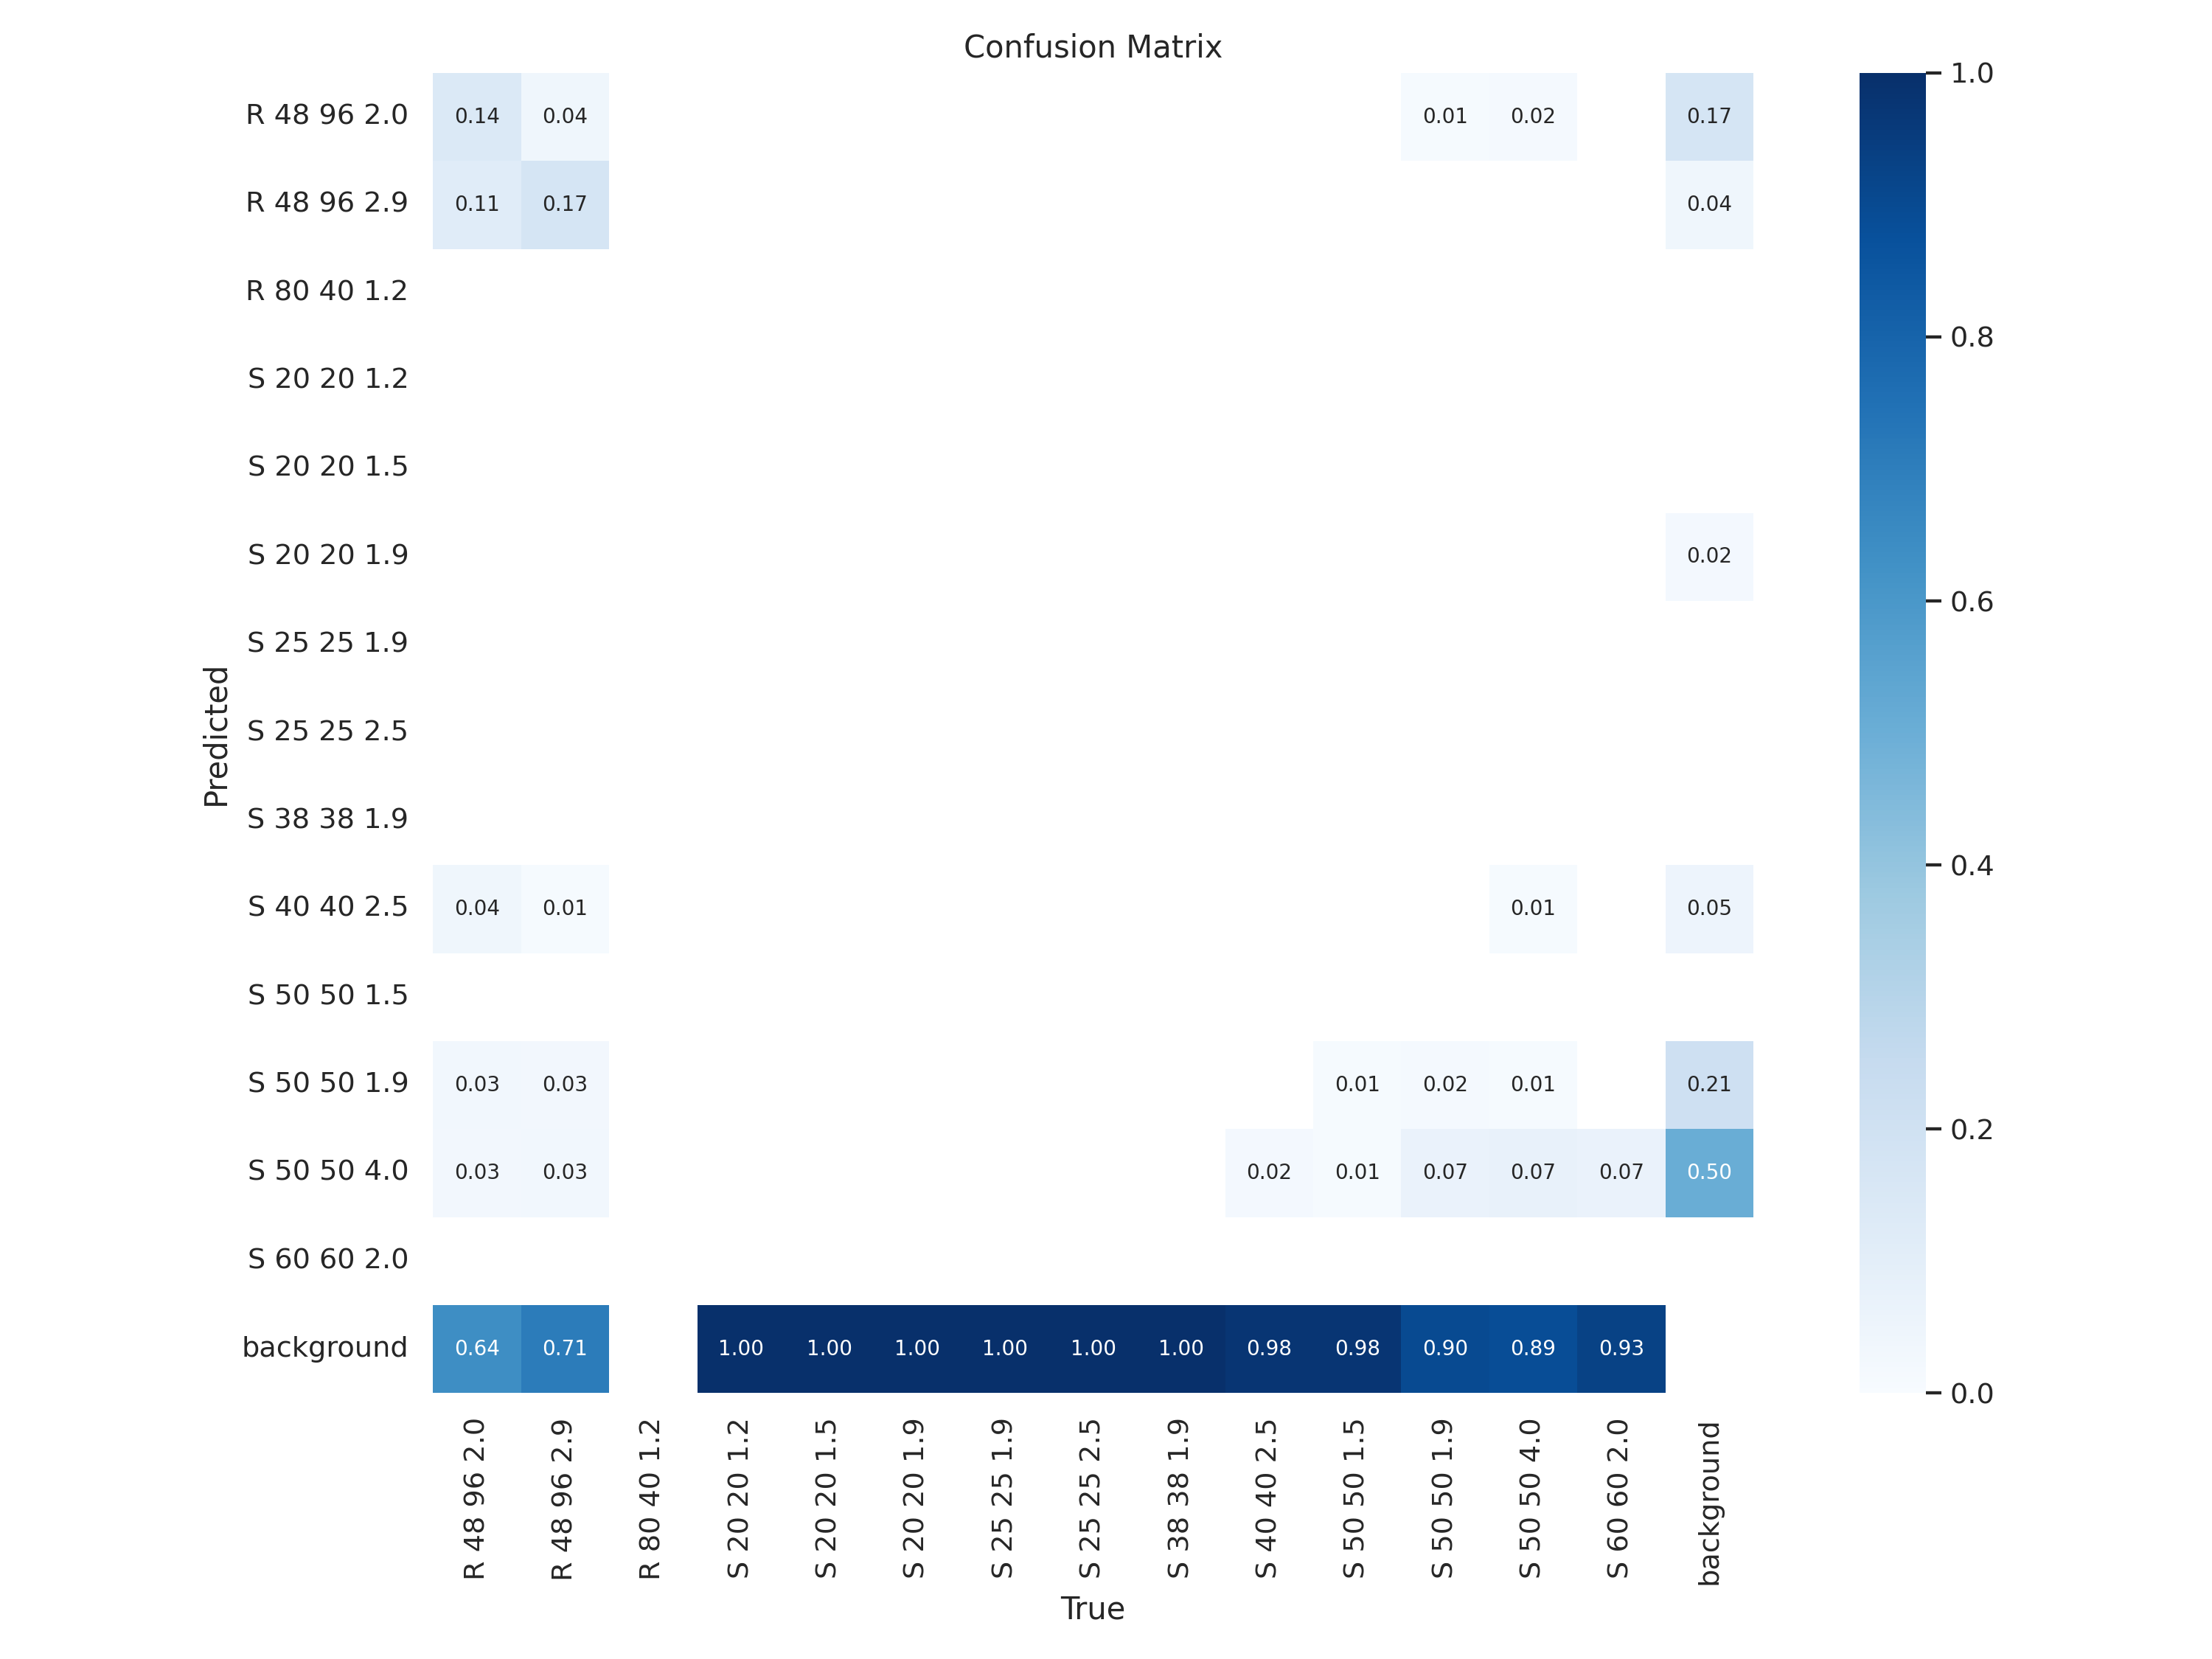

In [ ]:
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

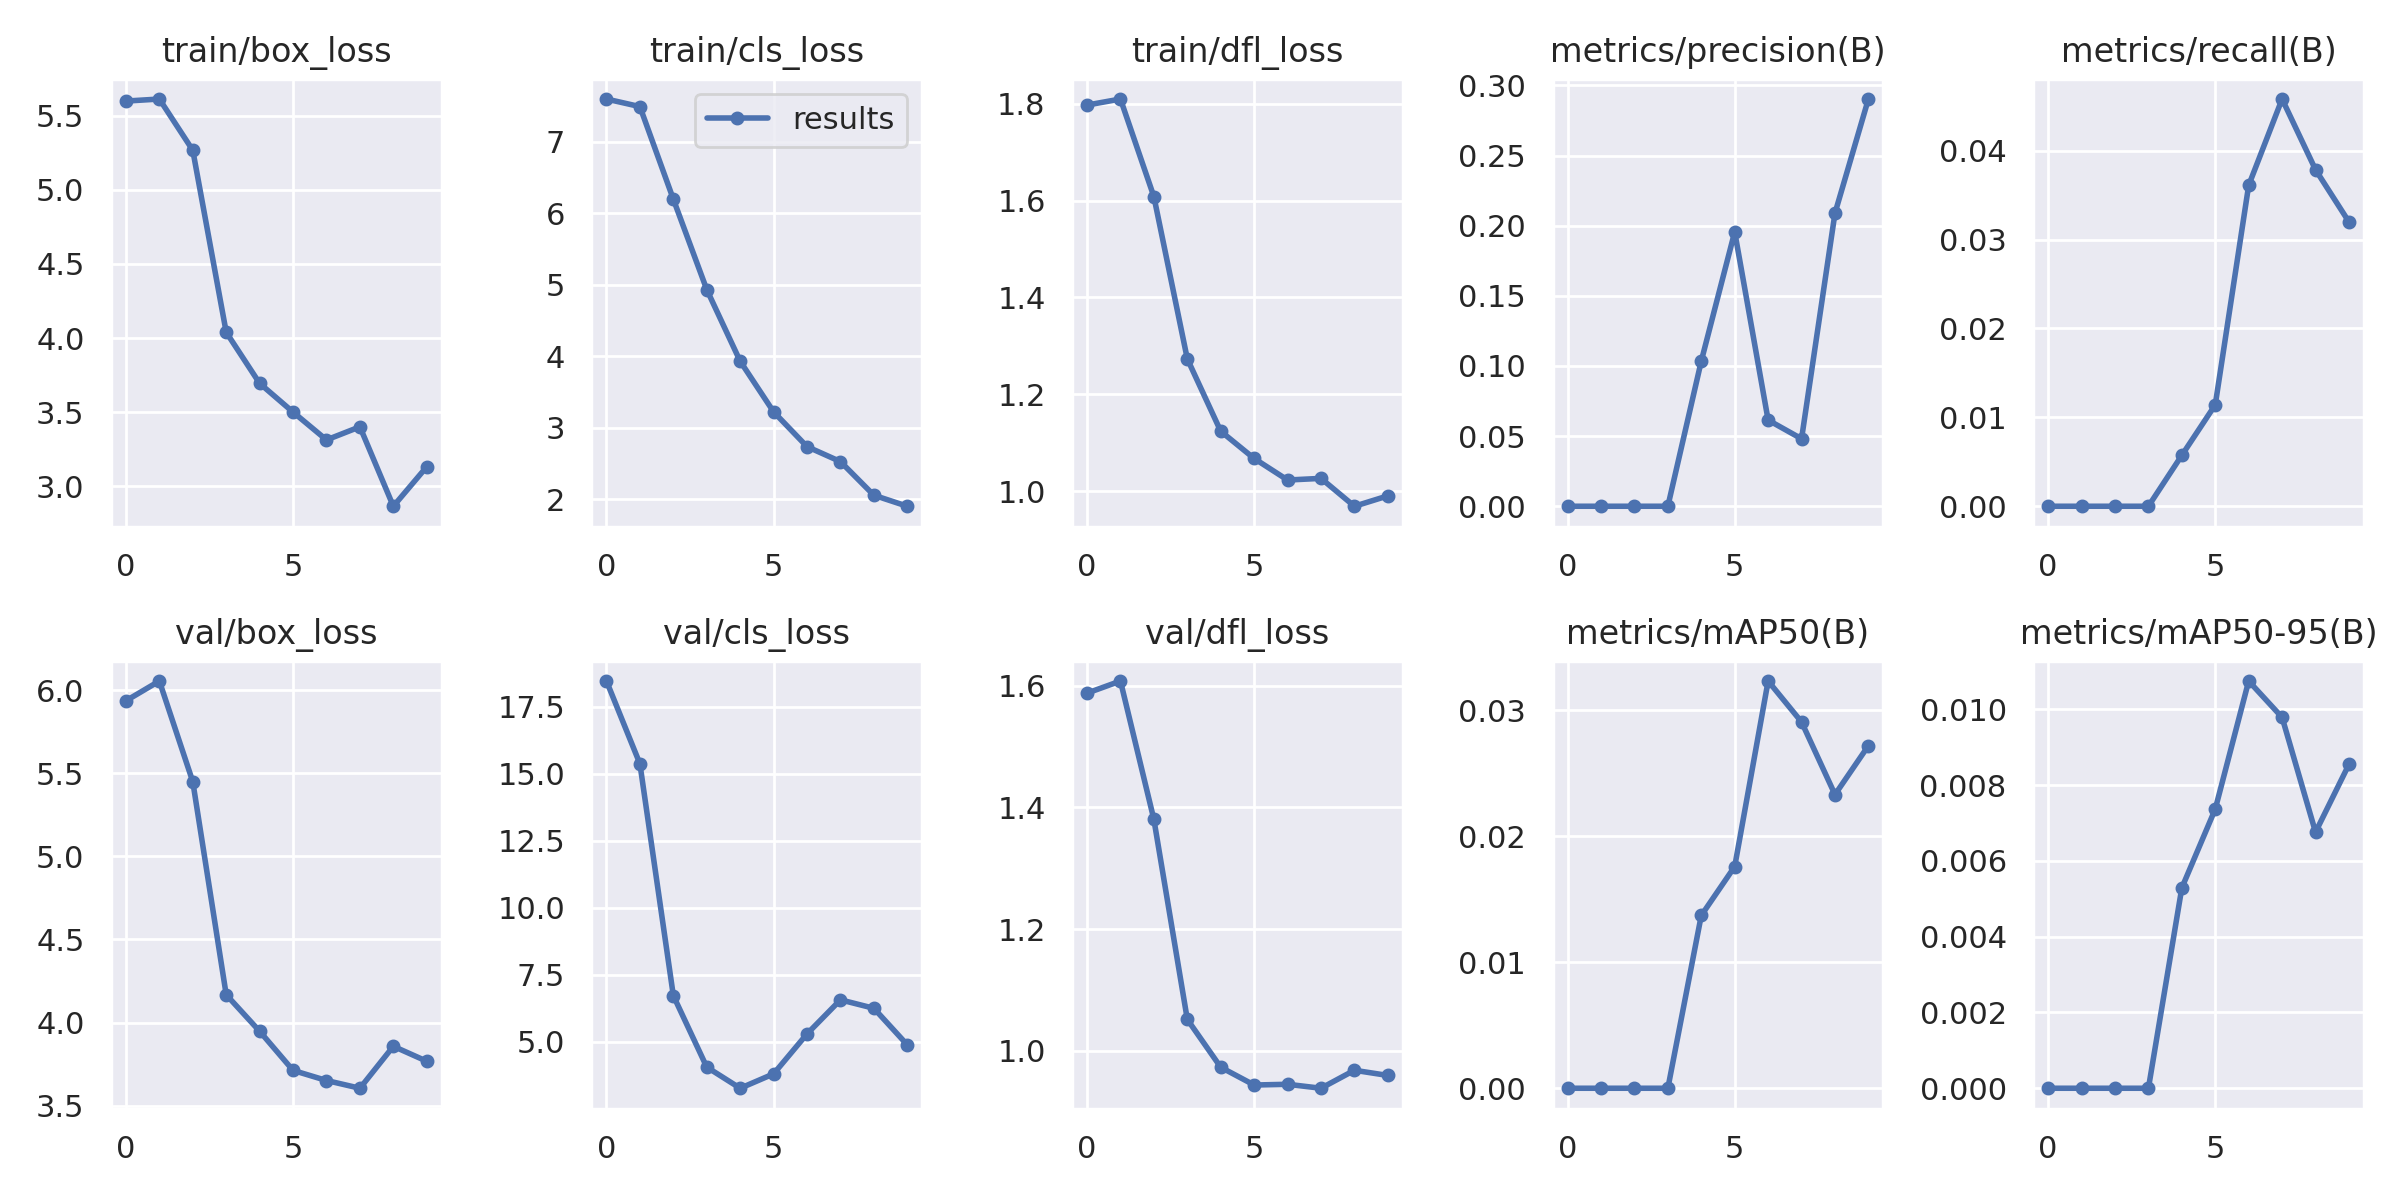

In [ ]:
Image(filename='/content/runs/detect/train3/results.png', width=600)

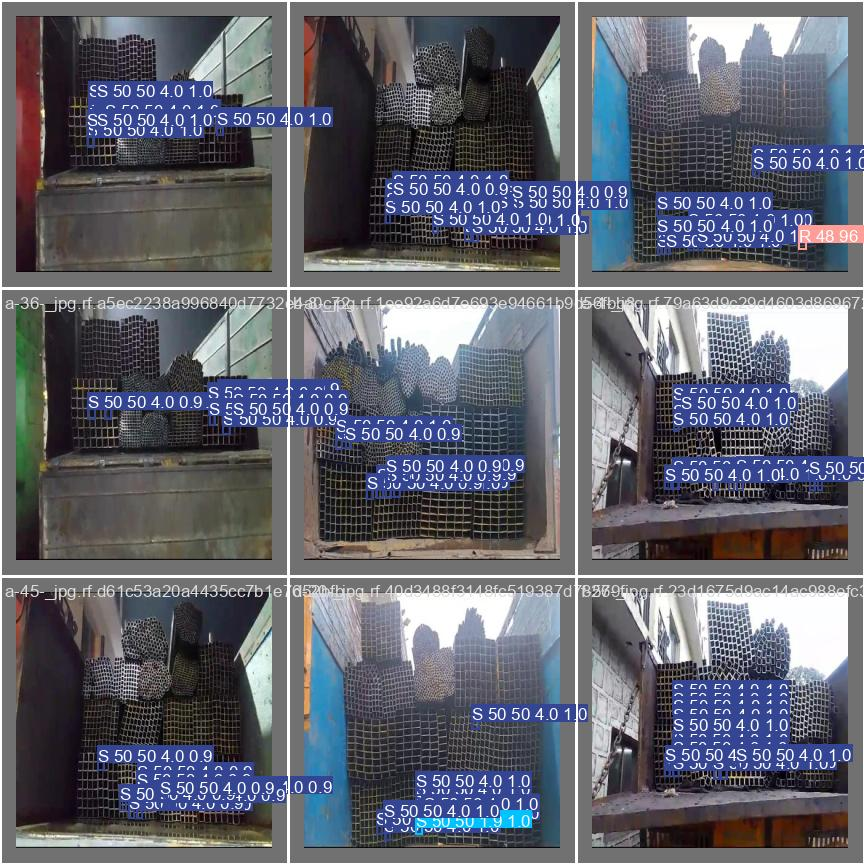

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/datasets/pipe-inventory-1/data.yaml

2023-10-16 14:27:51.053608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 14:27:52.063019: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/pipe-inventory-1/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.99s/it]
                   all          9       8058     0.0615     0.0362     0.0324     0.0109
           R 48 96 2.0          9        211      

In [ ]:
!yolo predict mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/pipe-inventory-1/test/images save=True

2023-10-16 14:29:05.551845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 14:29:06.611462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
image 1/8 /content/datasets/pipe-inventory-1/test/images/a-17-_jpg.rf.0325bcb344942563b4e6c2278ef80727.jpg: 256x256 1 S 20 20 1.9, 9 S 50 50 1.9s, 79 S 50 50 4.0s, 10.4ms
image 2/8 /content/datasets/pipe-inventory-1/test/images/a-34-_jpg.rf.0f60c1eeb6903d865a51f49103f379ec.jpg: 256x256 28 S 50 50 1.9s, 72 S 50 50 4.0s, 7.5ms
image 3/8 /content/datasets/pipe-inventory-1/test/images/b-22-_jpg.rf

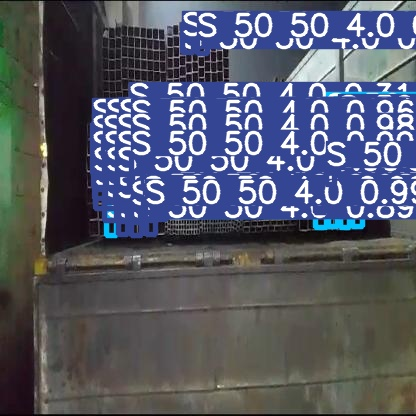

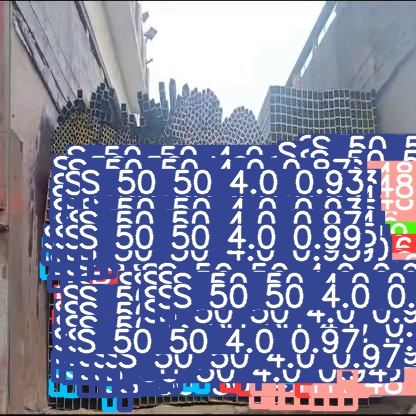

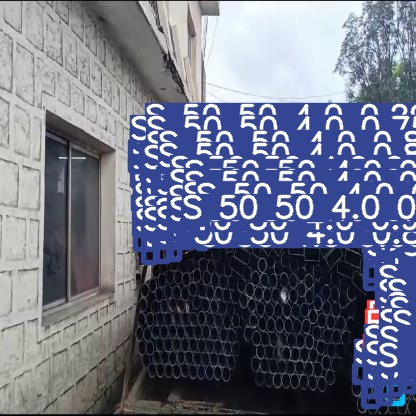

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
print("\n")